# Problem Statement :-

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

# Variables in the Dataset :-

1. age (numeric)
2. job : type of job
3. marital : marital status
4. educational_qual : education status
5. call_type : contact communication type
6. day: last contact day of the month (numeric)
7. mon: last contact month of year
8. dur: last contact duration, in seconds (numeric)
9. num_calls: number of contacts performed during this campaign and for this client 
10. prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
11. Output variable (desired target): y - has the client subscribed to the insurance?


# IMPORT LIBRARIES...

In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


# LOAD THE DATASET

In [2]:
df = pd.read_csv(r'C:\\Users\\NEW\\Downloads\\tmctrain.csv')
pd.set_option('display.max_columns',None)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.shape

(45211, 11)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [5]:
df = df.dropna(axis=0)

In [6]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


Here’s what it returns:

1. count: Number of non-null observations
2. mean: Mean of the values
3. std: Standard deviation of the observations
4. min: Minimum value
5. 25%: First quartile
6. 50%: Second quartile (Median)
7. 75%: Third quartile
8. max: Maximum value

It’s a quick way to get a summary of our data!

# Checking the Missing Values

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

hence there is no null values are occured :)

In [8]:
#find duplicate data
df.duplicated().sum()

6

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [11]:
df['age'].value_counts().sort_index()

18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [12]:
less_than_18 = df[df['age'] < 18].shape[0]
greater_than_65 = df[df['age'] > 65].shape[0]

print(f"Number of people less than 18: {less_than_18}")
print(f"Number of people greater than 65: {greater_than_65}")


Number of people less than 18: 0
Number of people greater than 65: 751


Typically, term insurance companies provide coverage to individuals who are between the ages of 18 and 65. However, in your dataset, there are 751 people. Let's explore this further during the Exploratory Data Analysis (EDA) phase, and then we can decide whether to retain this data or not.

let's see what is the maximum age in age column 😊

In [13]:
max_age = df['age'].max()
print("The maximum age in the dataset is:", max_age)


The maximum age in the dataset is: 95


In [14]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [15]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [16]:
df['marital'].value_counts() 

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [17]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [18]:
df['day'].value_counts().sort_index()

1      322
2     1292
3     1079
4     1445
5     1910
6     1932
7     1817
8     1840
9     1560
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1756
20    2752
21    2026
22     905
23     939
24     447
25     840
26    1035
27    1121
28    1829
29    1745
30    1566
31     643
Name: day, dtype: int64

In [19]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [20]:
df['mon'].value_counts().loc[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']]


jan     1403
feb     2649
mar      477
apr     2932
may    13765
jun     5339
jul     6894
aug     6245
sep      579
oct      738
nov     3970
dec      214
Name: mon, dtype: int64

In [21]:
df['dur'].value_counts()

124     187
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

[here the value '124' is a duration of a call in seconds and it appears '187' times] 
it means that the value ‘124’ appears 188 times in the ‘dur’ column, ‘90’ appears 184 times, ‘89’ appears 177 times, and so on. The values at the bottom of the list (like ‘1833’, ‘1545’, ‘1352’, etc.) appear only once in the ‘dur’ column.

In [22]:
df['num_calls'].value_counts().sort_index()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
24       20
25       22
26       13
27       10
28       16
29       16
30        8
31       12
32        9
33        6
34        5
35        4
36        4
37        2
38        3
39        1
41        2
43        3
44        1
46        1
50        2
51        1
55        1
58        1
63        1
Name: num_calls, dtype: int64

In [23]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [24]:
df['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [25]:
duplicates = df.duplicated()
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45205, dtype: bool

finally, there is nothing duplicate in df dataframe

In [26]:
df_shape = df.shape
df_shape

(45205, 11)

In [27]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

# Outliers

there are several ways to find an outlier like,

1. Sorting Method
2. Data Visualization Method
3. Statistical Tests (Z scores)
4. Interquartile Range Method (IQR)

here we gonna try 'z-score' and 'iqr' method and then we do a data visualization

for better understanding, here i gonna use the box plot to indentify an outlier

In [28]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

<AxesSubplot:xlabel='age'>

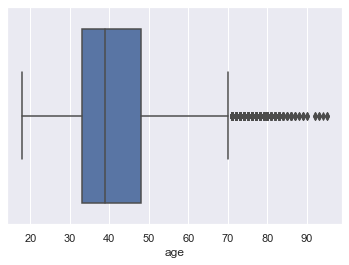

In [29]:
# 1. age (to find outlier)
sns.set(style="darkgrid")
sns.boxplot(x=df['age'])

In [30]:
#outlier found in "age" column, so we gonna remove that outlier by  using IQR 
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 70.5 Lower bound : 10.5


The clip() function in pandas is used to limit the values in an array or series between two values. In this case, df.age = df.age.clip(10.5,70.5) will limit the ‘age’ column in the dataframe df to be between 10.5 and 70.5.

Here’s what it does:

If a value in the ‘age’ column is less than 10.5, it will be replaced with 10.5. If a value in the ‘age’ column is greater than 70.5, it will be replaced with 70.5. All other values that are between 10.5 and 70.5 (inclusive) will remain unchanged.

In [31]:
df.age = df.age.clip(10.5,70.5)

<AxesSubplot:xlabel='age'>

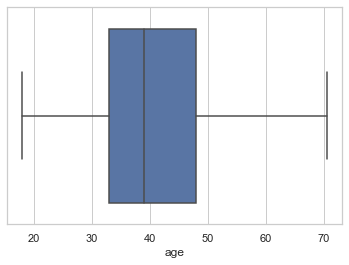

In [32]:
#check after outlier removal:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'])

<AxesSubplot:xlabel='day'>

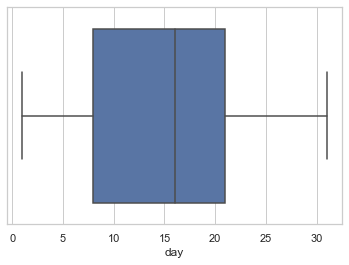

In [33]:
# 2. day (to find outlier)
sns.set(style="whitegrid")
sns.boxplot(x=df['day'])

<AxesSubplot:xlabel='dur'>

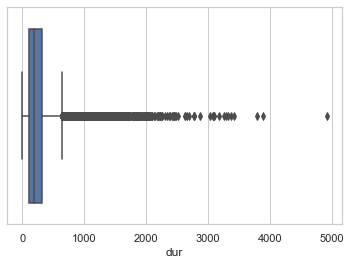

In [34]:
# 3. duration  (to find outlier)
sns.set(style="whitegrid")
sns.boxplot(df['dur'])

In [35]:
#outlier found in "duration" column, so we gonna remove that outlier by  using IQR 

q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 643.0 Lower bound : -221.0


In [36]:
df.dur = df.dur.clip(-221.0,643.0)

<AxesSubplot:xlabel='dur'>

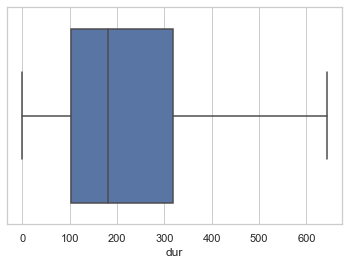

In [37]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'])

<AxesSubplot:xlabel='num_calls'>

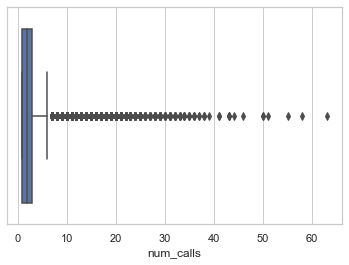

In [38]:
# 4. number of calls  (to find outlier)

sns.set(style="whitegrid")
sns.boxplot(df['num_calls'])

In [39]:
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [40]:
df.num_calls = df.num_calls.clip(-2.0,6.0)


<AxesSubplot:xlabel='num_calls'>

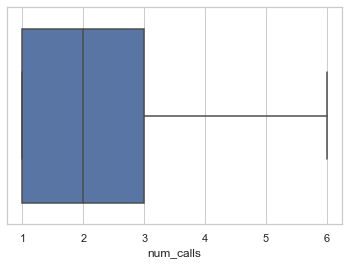

In [41]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'])

# EDA
## distribution of feature and target variable

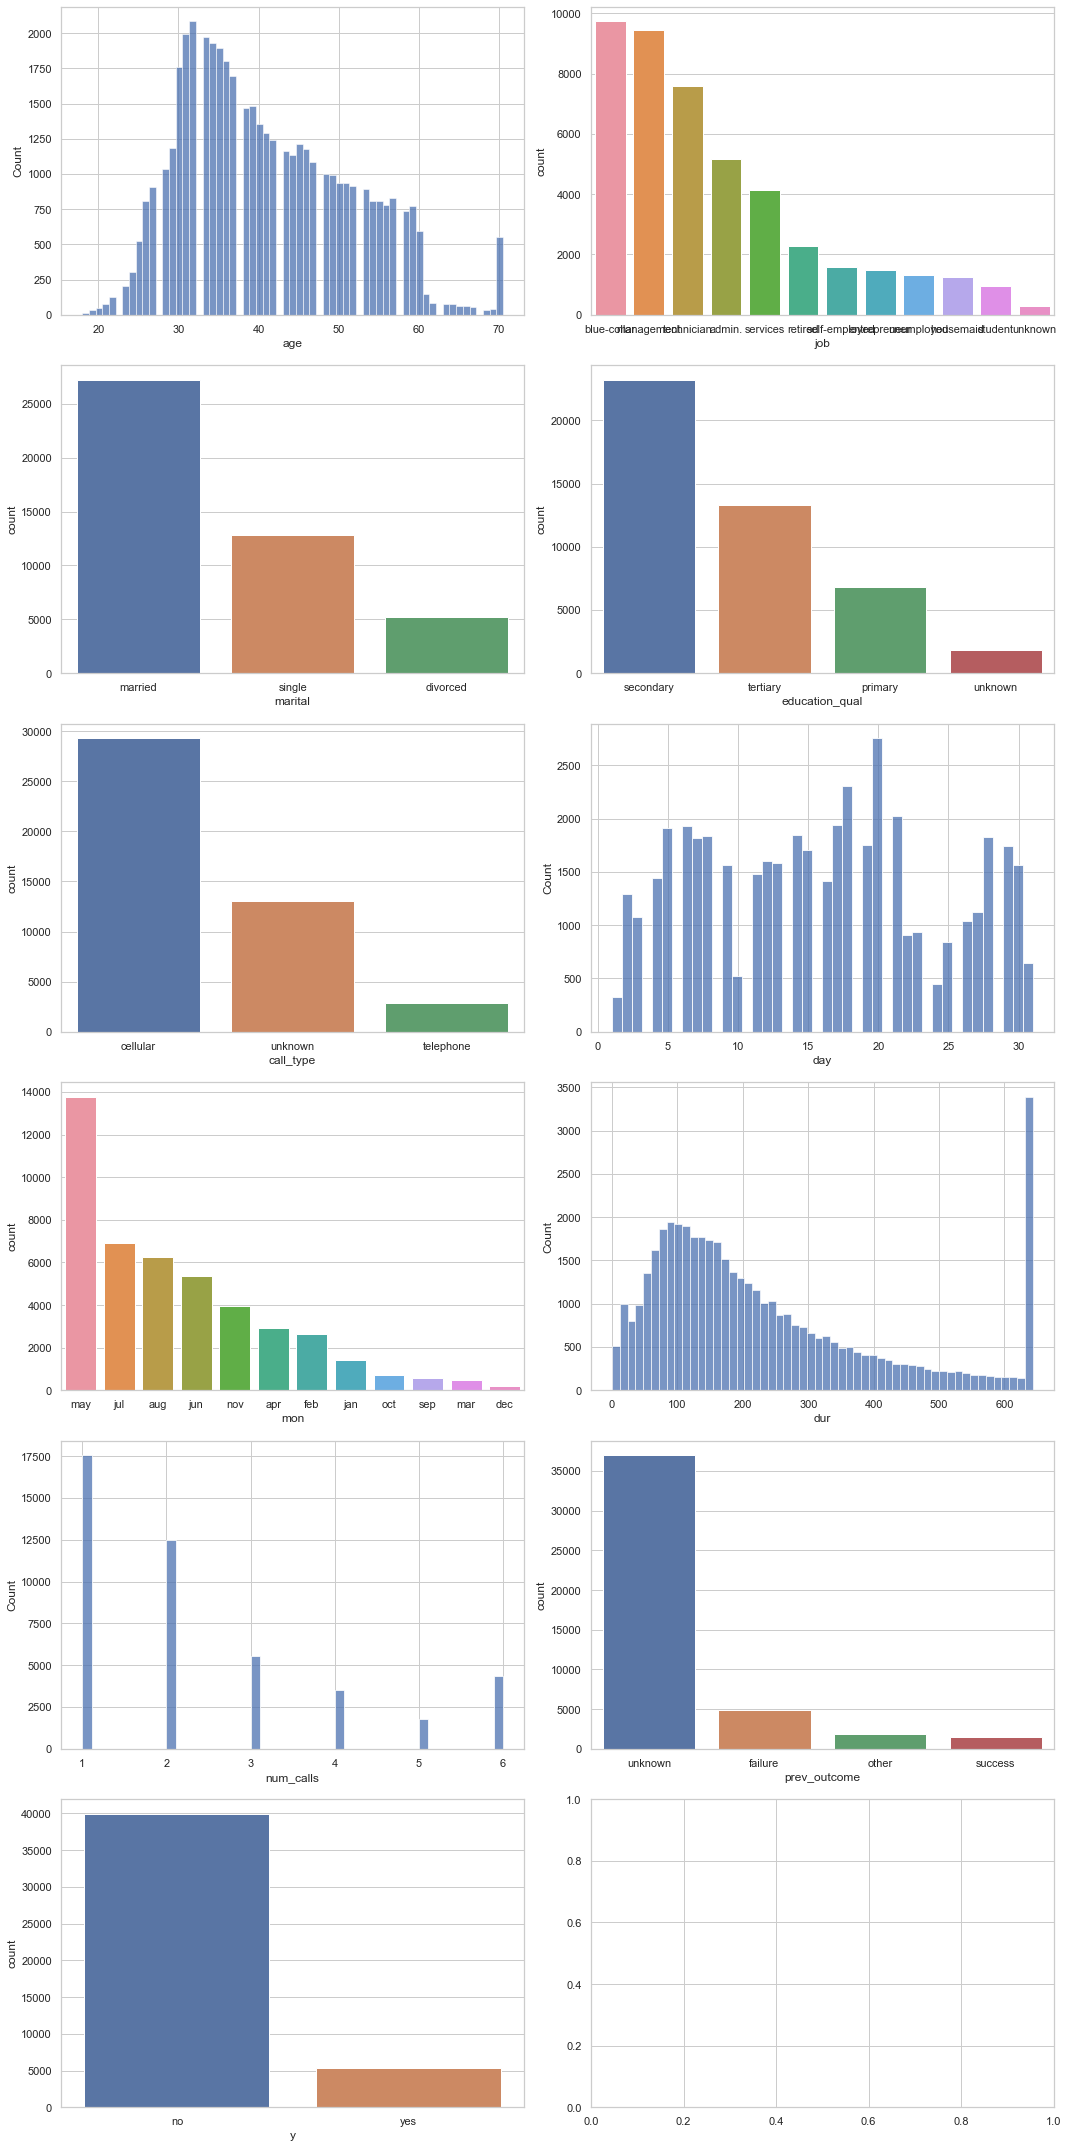

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(6, 2, figsize=(15, 30))

sns.histplot(df['age'], ax=axs[0, 0])
sns.countplot(df['job'], order=df['job'].value_counts().index, ax=axs[0, 1])
sns.countplot(df['marital'], order=df['marital'].value_counts().index, ax=axs[1, 0])
sns.countplot(df['education_qual'], order=df['education_qual'].value_counts().index, ax=axs[1, 1])
sns.countplot(df['call_type'], order=df['call_type'].value_counts().index, ax=axs[2, 0])
sns.histplot(df['day'], ax=axs[2, 1])
sns.countplot(df['mon'], order=df['mon'].value_counts().index, ax=axs[3, 0])
sns.histplot(df['dur'], ax=axs[3, 1])
sns.histplot(df['num_calls'], ax=axs[4, 0])
sns.countplot(df['prev_outcome'], order=df['prev_outcome'].value_counts().index, ax=axs[4, 1])
sns.countplot(df['y'], ax=axs[5, 0])

plt.tight_layout()
plt.show()

What we odserved from this EDA is :

1. Middle aged men (i.e 30-35 age) are targeted more. 
2. Blue Collar, Management and Technician people are targeted high. 
3. More calls are made to the married. 
4. People who have done their Secondary educations are targeted more. 
5. Cellular type calls are made more. 
6. Most number of calls have been made on the 20th day of the month. 
7. Number of calls are made in the May month is higher than any other month. 
8. Mostly they are calling once only. Average number of calls is 3. 
9. Most of the previous outcome of the calls are unknown. 
10. Only few people have subscribed to the insurance. which means, the data is highly imbalanced. 

# feature vs target

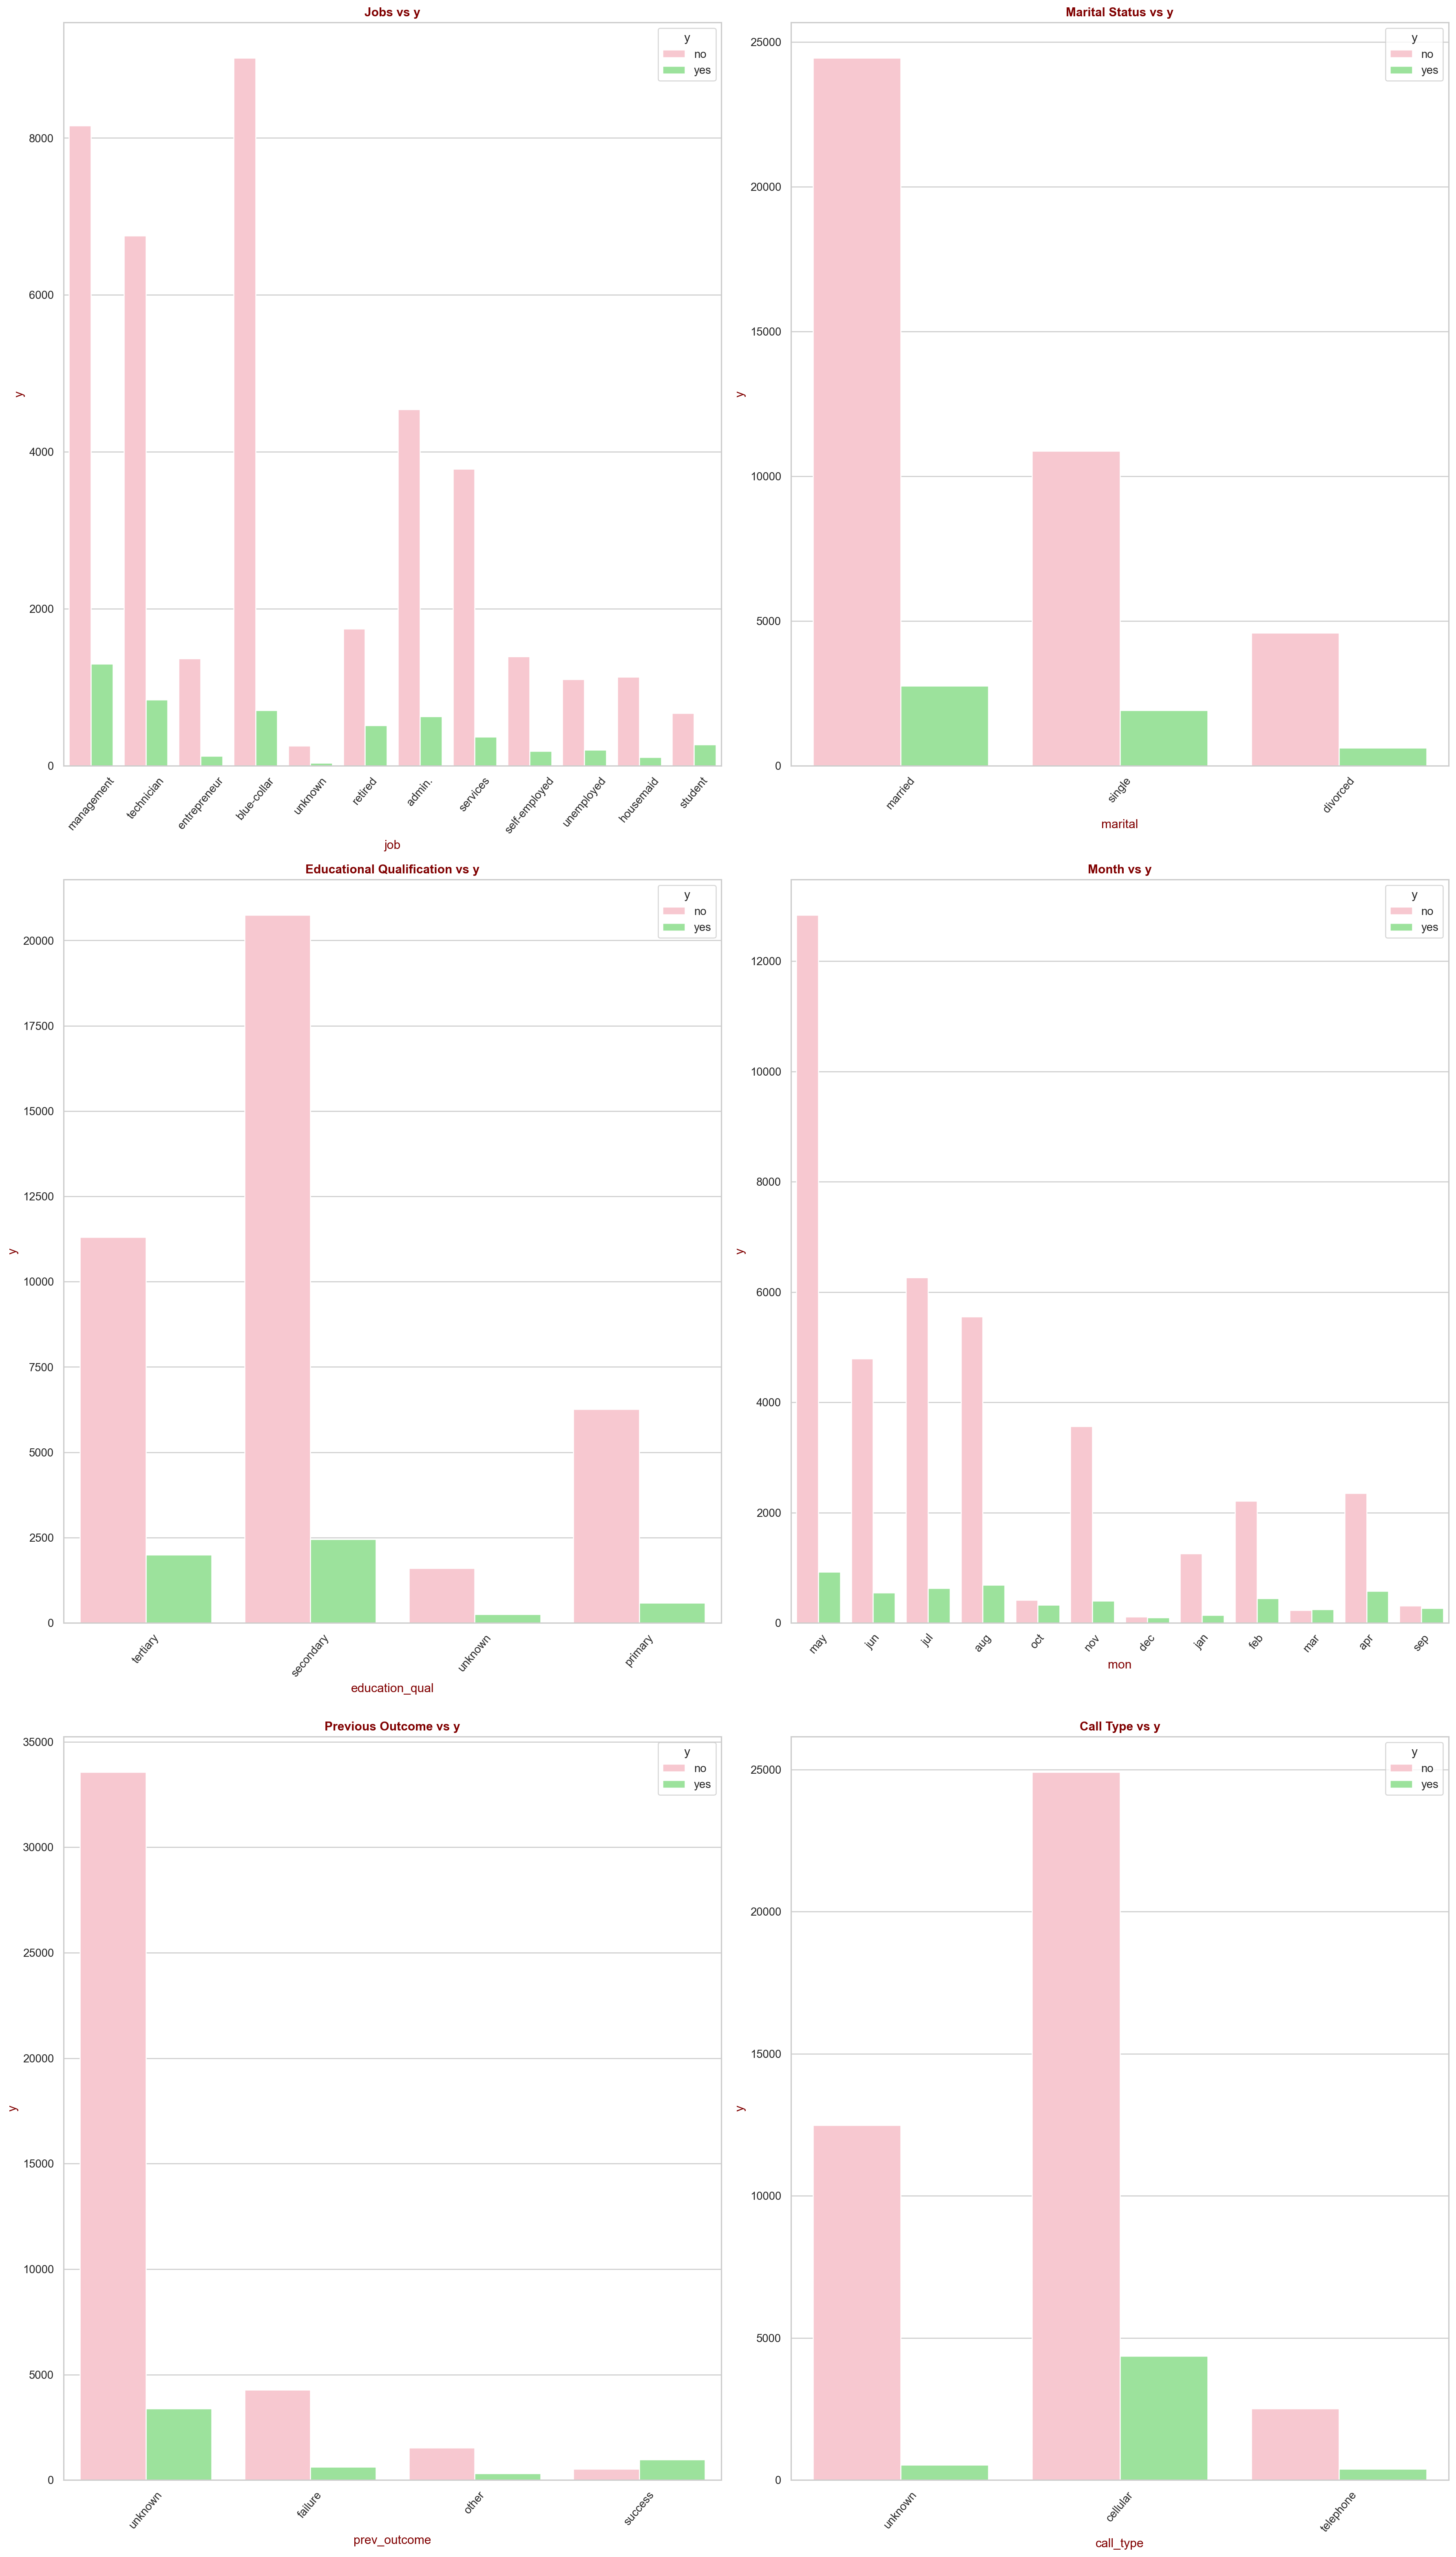

In [43]:
# Define the features and their titles
features = ['job', 'marital', 'education_qual', 'mon', 'prev_outcome', 'call_type']
titles = ['Jobs vs y', 'Marital Status vs y', 'Educational Qualification vs y', 
          'Month vs y', 'Previous Outcome vs y', 'Call Type vs y']

plt.figure(figsize=(20,35), dpi=180)

# Loop through the features and create a subplot for each one
for i in range(len(features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=features[i], hue='y', data=df, palette=['pink', 'LightGreen'])
    plt.xticks(rotation=50)
    plt.title(titles[i], fontweight='bold', color='maroon')
    plt.xlabel(features[i], color='maroon')
    plt.ylabel('y', color='maroon')

plt.tight_layout()
plt.show()

## ANALYSIS

1. Management personnel are subscribed more.
2. Married individuals are insured more.
3. People with secondary education qualifications are insured more.
4. More people are insured in the month of May.
5. If the outcome of the previous call was successful, then the customer is more likely to convert.
6. More conversions have been made through cellular calls.



# Numerical Variable vs Target-y -- Age, Day, Duration, No of Calls

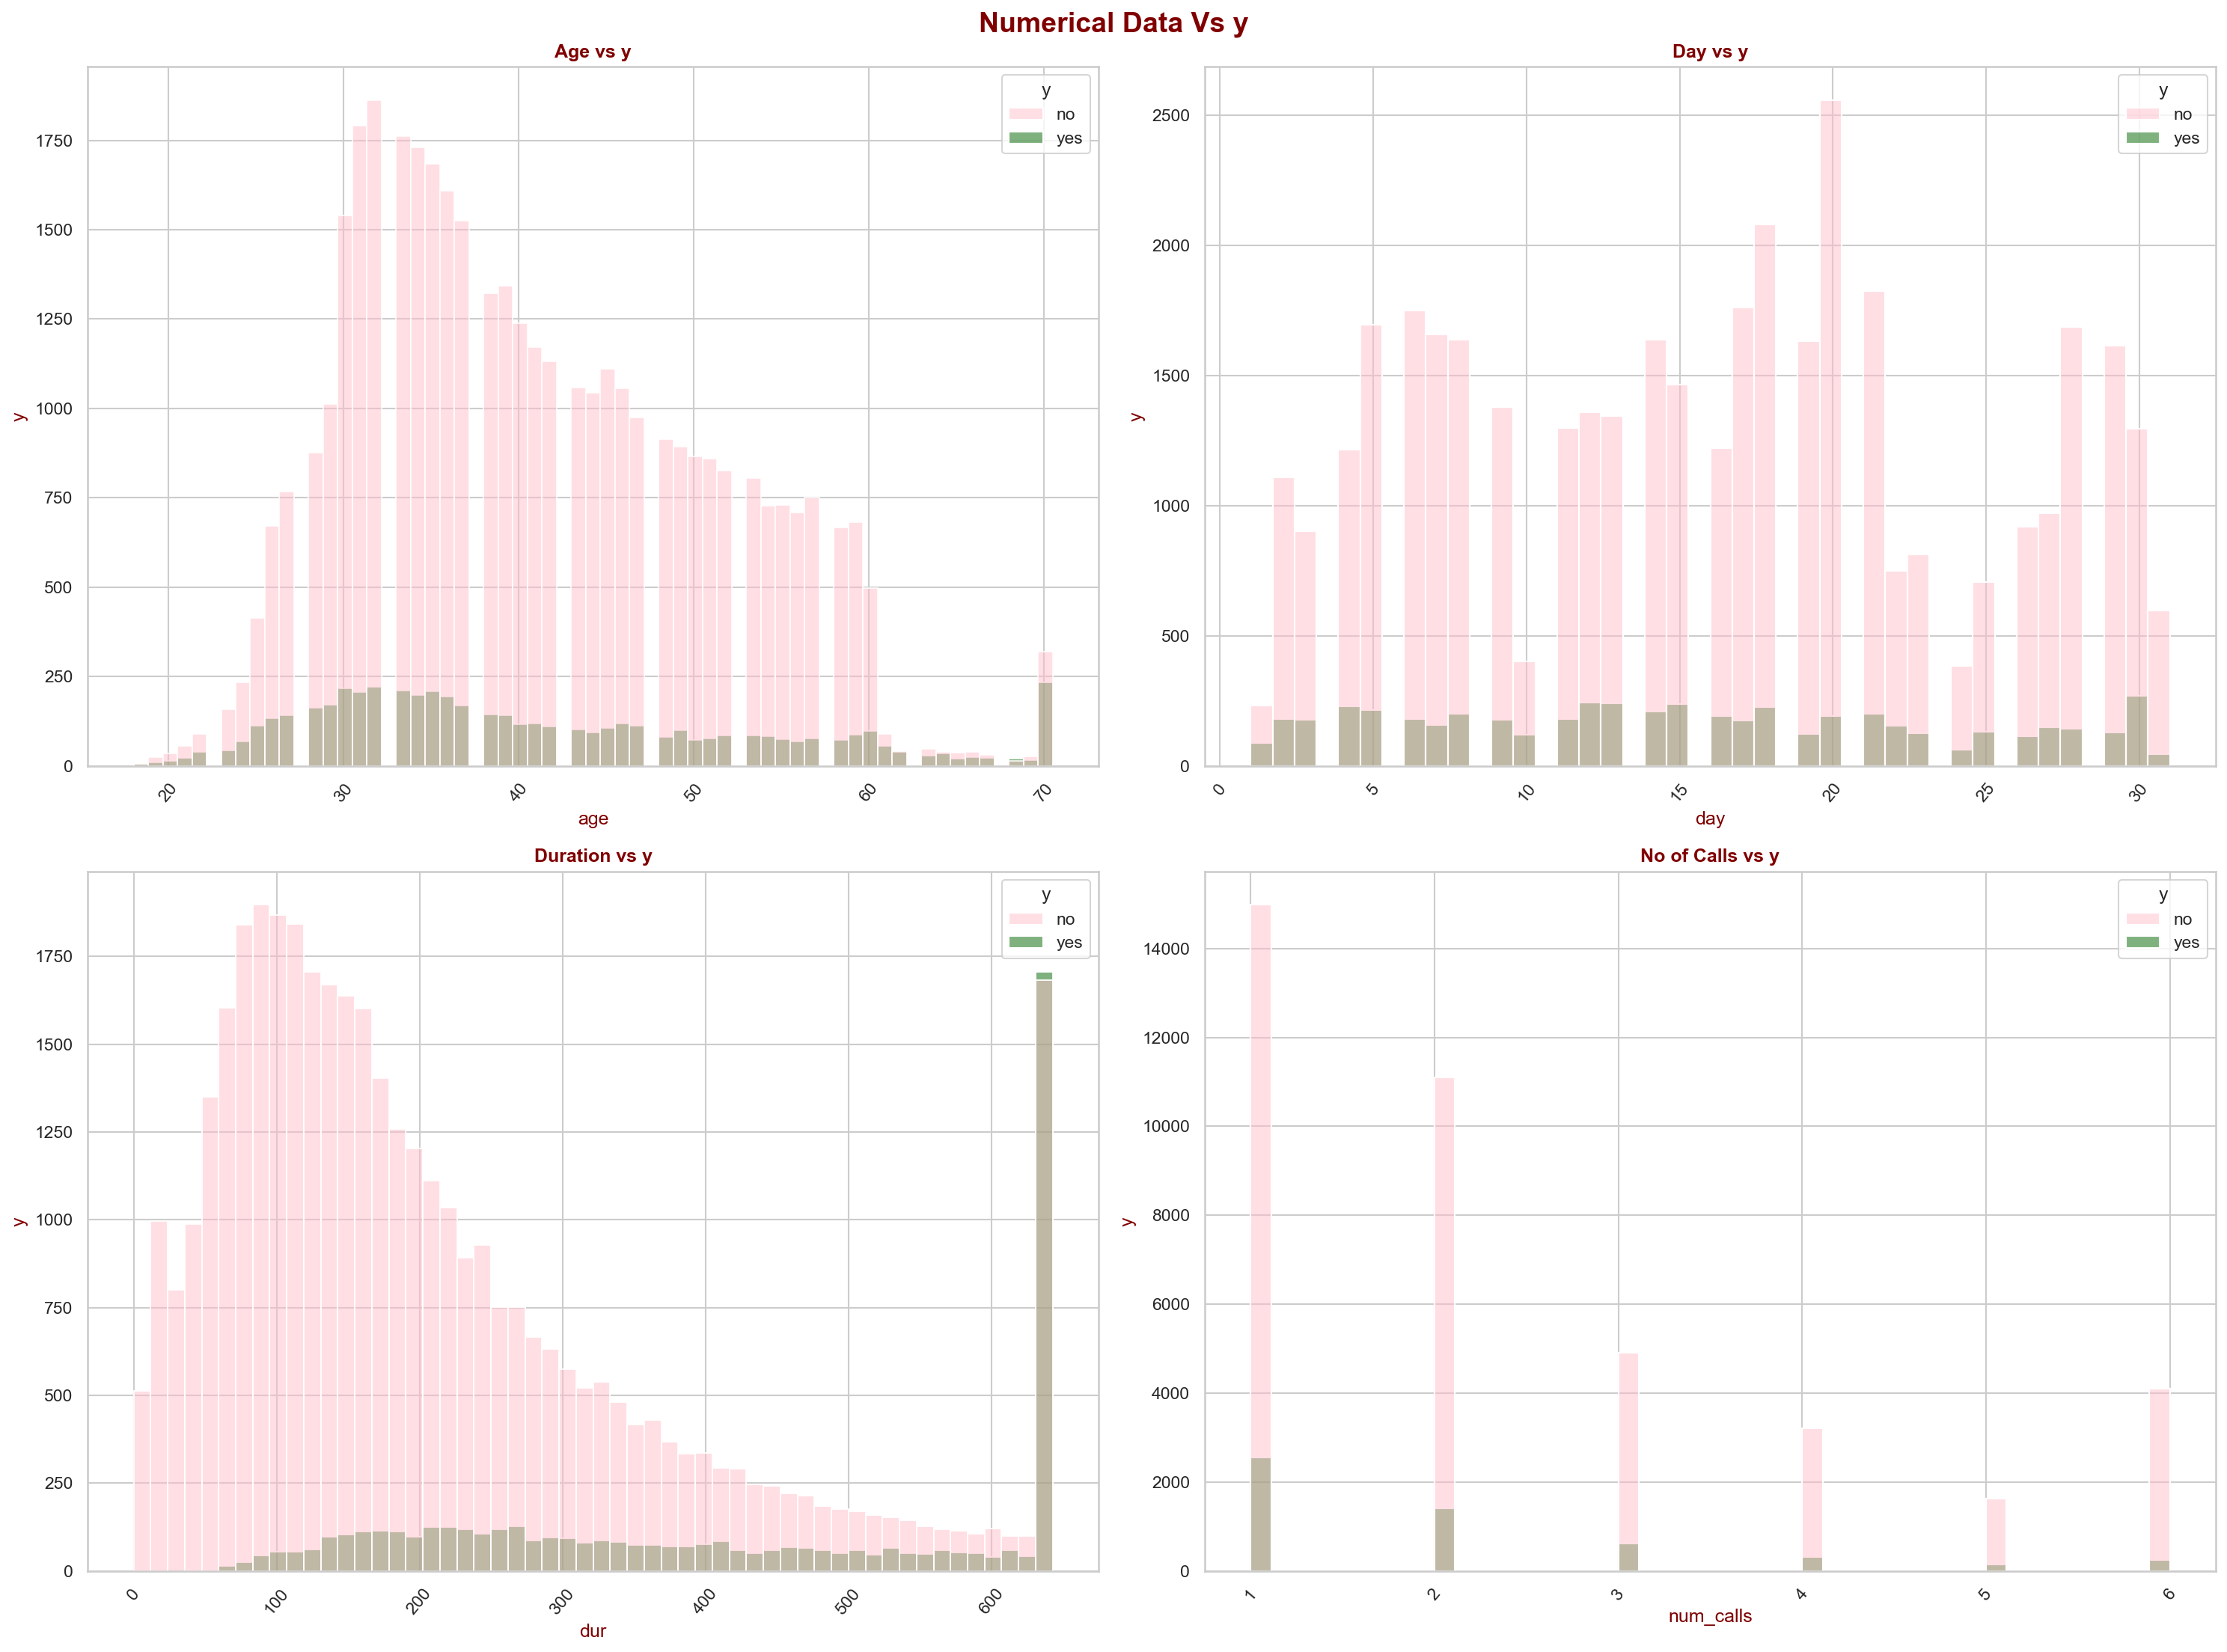

In [44]:
# Define the features and their titles
features = ['age', 'day', 'dur', 'num_calls']
titles = ['Age vs y', 'Day vs y', 'Duration vs y', 'No of Calls vs y']

plt.figure(figsize=(20, 15), dpi=150)
plt.suptitle("Numerical Data Vs y", fontsize=18,  fontweight='bold', color='maroon')

# Loop through the features and create a subplot for each one
for i in range(len(features)):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=features[i], hue='y', data=df, palette=['pink', 'DarkGreen'])
    plt.xticks(rotation=50)
    plt.title(titles[i], fontweight='bold', color='maroon')
    plt.xlabel(features[i], color='maroon')
    plt.ylabel('y', color='maroon')

plt.tight_layout()
plt.show()

# ANALYSIS

1. People aged 30-40 have subscribed more.
2. People are insured throughout the entire day in a month.
3. The minimum duration of the call should be 100 seconds and max is 600+ sec.
4. A single call is often sufficient to convert the customer.

In [93]:
#for better understanding
import plotly.express as px

fig = px.scatter(df, x=df.index, y='dur', hover_data=['dur'])
fig.update_layout(
    title='Scatter plot of duration',
    xaxis_title='Index',
    yaxis_title='Duration',
    autosize=False,
    width=1000,
    height=500,
)
fig.show()


before get into the ML model, change the values into numerical value of the categorical data as much as possible

# Encoding...

In [46]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [47]:
#JOB
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
a = Label_Encoder.fit_transform(df.job)
a
df.job=a
df.job.unique()


array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [48]:
df['education_qual'] = df['education_qual'].replace({ 'tertiary':3, 'secondary':2, 'unknown':0, 'primary':1})
df['education_qual']
#here we given unknown =0, primary =1, secondary =2, tertiary =3

0        3
1        2
2        2
3        0
4        0
        ..
45206    3
45207    1
45208    2
45209    2
45210    2
Name: education_qual, Length: 45205, dtype: int64

In [49]:
#call_type
df['call_type'] = df['call_type'].replace({'unknown':2, 'cellular':1, 'telephone':0})
df['call_type']

0        2
1        2
2        2
3        2
4        2
        ..
45206    1
45207    1
45208    1
45209    0
45210    1
Name: call_type, Length: 45205, dtype: int64

In [50]:
#month
df['mon']=df['mon'].replace({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,'mar':3, 'apr':4, 'sep':9})
df['mon']

0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: mon, Length: 45205, dtype: int64

In [51]:
df['prev_outcome'] = df['prev_outcome'].replace({'unknown':2, 'failure':0, 'other':3, 'success':1})
df['prev_outcome']

0        2
1        2
2        2
3        2
4        2
        ..
45206    2
45207    2
45208    1
45209    2
45210    3
Name: prev_outcome, Length: 45205, dtype: int64

In [52]:
df['marital'] = df['marital'].replace({'married':2, 'single':1, 'divorced':0})
df['marital']

0        2
1        1
2        2
3        2
4        1
        ..
45206    2
45207    0
45208    2
45209    2
45210    2
Name: marital, Length: 45205, dtype: int64

In [53]:
df.y = df.y.map({'no':0,'yes':1})


In [54]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,4,2,3,2,5,5,261.0,1.0,2,0
1,44.0,9,1,2,2,5,5,151.0,1.0,2,0
2,33.0,2,2,2,2,5,5,76.0,1.0,2,0
3,47.0,1,2,0,2,5,5,92.0,1.0,2,0
4,33.0,11,1,0,2,5,5,198.0,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,2,3,1,17,11,643.0,3.0,2,1
45207,70.5,5,0,1,1,17,11,456.0,2.0,2,1
45208,70.5,5,2,2,1,17,11,643.0,5.0,1,1
45209,57.0,1,2,2,0,17,11,508.0,4.0,2,0


In [55]:
df.isnull().sum()


age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [56]:
df.dtypes


age               float64
job                 int32
marital             int64
education_qual      int64
call_type           int64
day                 int64
mon                 int64
dur               float64
num_calls         float64
prev_outcome        int64
y                   int64
dtype: object

In [57]:
df = df.astype(int)
df.dtypes


age               int32
job               int32
marital           int32
education_qual    int32
call_type         int32
day               int32
mon               int32
dur               int32
num_calls         int32
prev_outcome      int32
y                 int32
dtype: object

# Import Required ML Libraries...

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

here the target is "y" column, hence its a categorical data. so we starts with the logistic regression

In [59]:
X = df.drop('y',axis=1)
y = df['y']

In [60]:
X

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58,4,2,3,2,5,5,261,1,2
1,44,9,1,2,2,5,5,151,1,2
2,33,2,2,2,2,5,5,76,1,2
3,47,1,2,0,2,5,5,92,1,2
4,33,11,1,0,2,5,5,198,1,2
...,...,...,...,...,...,...,...,...,...,...
45206,51,9,2,3,1,17,11,643,3,2
45207,70,5,0,1,1,17,11,456,2,2
45208,70,5,2,2,1,17,11,643,5,1
45209,57,1,2,2,0,17,11,508,4,2


In [61]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45205, dtype: int32

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36164, 10) (9041, 10) (36164,) (9041,)


In [64]:
X_train

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
23096,50,1,2,1,0,26,8,39,6,2
6633,30,4,1,3,2,28,5,261,6,2
313,37,7,0,2,2,5,5,214,2,2
16526,39,0,0,3,1,23,7,85,2,2
44313,55,9,2,3,1,28,7,340,1,1
...,...,...,...,...,...,...,...,...,...,...
11286,36,7,2,2,2,18,6,111,2,2
44738,70,5,2,2,0,8,9,606,3,1
38164,34,1,2,2,1,15,5,160,1,0
860,33,5,2,2,2,7,5,111,1,2


In [65]:
y_train

23096    0
6633     0
313      0
16526    0
44313    1
        ..
11286    0
44738    1
38164    0
860      0
15799    0
Name: y, Length: 36164, dtype: int32

# Scaling the datas...

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


# Checking Data-Balance

Class 0: 39916
Class 1: 5289
average of class 0 is  88.3 %


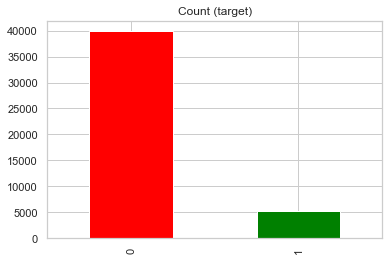

In [67]:
colors = ['red', 'green']
target_count = df.y.value_counts()
target_count.plot(kind='bar', color=colors, title='Count (target)')
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('average of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')



Class 0: 31961
Class 1: 4203
average of class 0 is  88.38 %


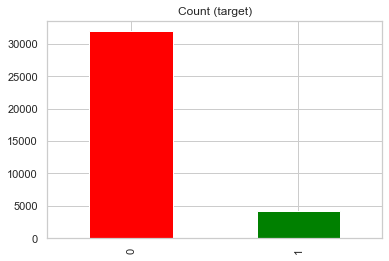

In [68]:
colors = ['red', 'green']
target_count = y_train.value_counts()
target_count.plot(kind='bar', color=colors, title='Count (target)')
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('average of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')


In [69]:
print(df['y'].value_counts())


0    39916
1     5289
Name: y, dtype: int64


Based on the output, our dataset is indeed imbalanced. The class labeled ‘0’ has 39,916 instances, while the class labeled ‘1’ has only 5,289 instances. This means that the ‘0’ class is significantly more frequent than the ‘1’ class.
In such cases, we might need to consider techniques for handling imbalanced datasets when building our machine learning model. These could include resampling strategies (like oversampling the minority class or undersampling the majority class), using different evaluation metrics that are more robust to imbalance (like precision, recall, F1 score or AUC-ROC instead of accuracy), or using models that are more robust to class imbalance. The choice among these strategies depends on your specific use case and the nature of our data.

# Balancing the data...

In [70]:
from imblearn.over_sampling import SMOTE
#Synthetic Minority Over-sampling Technique (SMOTE)
smote = SMOTE(sampling_strategy = 'minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)


Class 0: 31961
Class 1: 31961


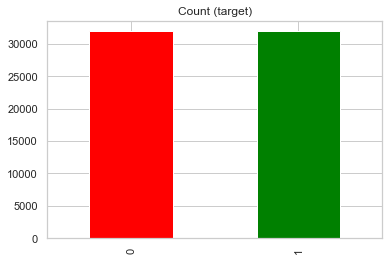

In [71]:
color = ['red','green']
target_count = y_smote.value_counts()
target_count.plot(kind='bar', color = color, title='Count (target)');

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

Class 0: 31697
Class 1: 31697
the average of class 0 is  50.0 %


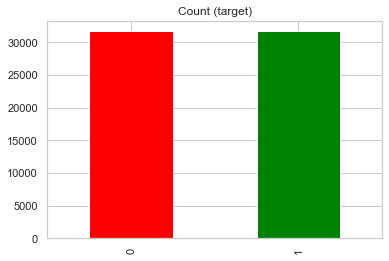

In [72]:
from imblearn.combine import SMOTETomek

smtmk = SMOTETomek(sampling_strategy = 'minority')
X_smtmk , y_smtmk = smtmk.fit_resample(X_train,y_train)
color = ['red','green']

target_count = y_smtmk.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('the average of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar',color = color,  title='Count (target)');
     

Class 0: 23109
Class 1: 29914
Proportion of class 0 is  43.58 %


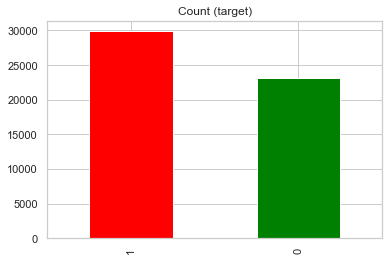

In [73]:
from imblearn.combine import SMOTEENN

smtenn = SMOTEENN(sampling_strategy = 'minority')
X_smtenn , y_smtenn = smtenn.fit_resample(X_train,y_train)
color = ['red','green']

target_count = y_smtenn.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar',color=color, title='Count (target)');

# ML MODEL

## 1) LOGISTIC REGRESSION :

In [74]:
import warnings
warnings.filterwarnings('ignore')


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

lr = LogisticRegression()
lr.fit(X_smote, y_smote)
y_pred_lr = lr.predict(X_test)
f1_lr = f1_score(y_test, y_pred_lr)

print(f'F1 Score: {f1_lr}')
pred_probs_lr = lr.predict_proba(X_test)
auc_score_lr = roc_auc_score(y_test, pred_probs_lr[:,1])
print(f'AUC Score: {auc_score_lr}')


F1 Score: 0.43465577596266036
AUC Score: 0.8357076464875514


## 2) KNN (K-Nearest Neighbors)

### (w/smote)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score

knn = KNeighborsClassifier()
knn.fit(X_smote, y_smote)
y_pred_knn = knn.predict(X_test)
f1_knn = f1_score(y_test, y_pred_knn)
print(f'F1 Score: {f1_knn}')
pred_probs_knn = knn.predict_proba(X_test)
auc_score_knn = roc_auc_score(y_test, pred_probs_knn[:,1])
print(f'AUC Score: {auc_score_knn}')


F1 Score: 0.3838805970149254
AUC Score: 0.7574782414432935


### (w/smote-tomek)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score

knn = KNeighborsClassifier()
knn.fit(X_smtmk, y_smtmk)
y_pred_knn2 = knn.predict(X_test)
f1_knn2 = f1_score(y_test, y_pred_knn2)
print(f'F1 Score: {f1_knn2}')
pred_probs_knn2 = knn.predict_proba(X_test)
auc_score_knn2 = roc_auc_score(y_test, pred_probs_knn2[:,1])
print(f'AUC Score: {auc_score_knn2}')

F1 Score: 0.3854916067146283
AUC Score: 0.7550633570741498


## 3) RANDOM FOREST

### (w/smote)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_smote, y_smote)
y_pred_rf1 = rf.predict(X_test)
f1_rf1 = f1_score(y_test, y_pred_rf1)
print(f'F1 Score: {f1_rf1}')
pred_probs_rf1 = rf.predict_proba(X_test)
auc_score_rf1 = roc_auc_score(y_test, pred_probs_rf1[:,1])
print(f'AUC Score: {auc_score_rf1}')


F1 Score: 0.5827759197324414
AUC Score: 0.9114590242304491


### (w/smote-tomek)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_smtmk, y_smtmk)
y_pred_rf2 = rf.predict(X_test)
f1_rf2 = f1_score(y_test, y_pred_rf2)
print(f'F1 Score: {f1_rf2}')
pred_probs_rf2 = rf.predict_proba(X_test)
auc_score_rf2 = roc_auc_score(y_test, pred_probs_rf2[:,1])
print(f'AUC Score: {auc_score_rf2}')

F1 Score: 0.5762993762993762
AUC Score: 0.9127837525306367


### (w/smote-ENN)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_smtenn, y_smtenn)

y_pred_rf3 = rf.predict(X_test)

f1_rf3 = f1_score(y_test, y_pred_rf3)
print(f'F1 Score: {f1_rf3}')

pred_probs_rf3 = rf.predict_proba(X_test)
auc_score_rf3 = roc_auc_score(y_test, pred_probs_rf3[:,1])
print(f'AUC Score: {auc_score_rf3}')


F1 Score: 0.566949706074461
AUC Score: 0.9103079824010056


## 4) XG BOOST

### (w/smote)

In [81]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score

xgb = XGBClassifier()
xgb.fit(X_smote, y_smote)
y_pred_xgb1 = xgb.predict(X_test)
f1_xgb1 = f1_score(y_test, y_pred_xgb1)
print(f'F1 Score: {f1_xgb1}')
pred_probs_xgb1 = xgb.predict_proba(X_test)
auc_score_xgb1 = roc_auc_score(y_test, pred_probs_xgb1[:,1])
print(f'AUC Score: {auc_score_xgb1}')


F1 Score: 0.5939820242282142
AUC Score: 0.917517157398951


### (w/smote-tomek)

In [82]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score

xgb = XGBClassifier()
xgb.fit(X_smtmk, y_smtmk)
y_pred_xgb2 = xgb.predict(X_test)
f1_xgb2 = f1_score(y_test, y_pred_xgb2)
print(f'F1 Score: {f1_xgb2}')
pred_probs_xgb2 = xgb.predict_proba(X_test)
auc_score_xgb2 = roc_auc_score(y_test, pred_probs_xgb2[:,1])
print(f'AUC Score: {auc_score_xgb2}')


F1 Score: 0.6007067137809188
AUC Score: 0.9178370970225012


### (w/smote-enn)

In [83]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_smtenn,y_smtenn)
y_pred_xgb3 = xgb.predict(X_test)
f1_xgb3 = f1_score(y_test,y_pred_xgb3)
print('F1 Score : ', f1_xgb3)
pred_probs_xgb3= xgb.predict_proba(X_test)
auc_score_xgb3= roc_auc_score(y_test, pred_probs_xgb3[:,1])
print('ROC AUC score : ',auc_score_xgb3 )

F1 Score :  0.5816525699414444
ROC AUC score :  0.9172197894926919


## 5) CAT BOOST
### (smote)

In [84]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score

cb = CatBoostClassifier()
cb.fit(X_smote, y_smote)
y_pred_cb1 = cb.predict(X_test)
print(y_pred_cb1)
f1_cb1 = f1_score(y_test, y_pred_cb1)
print(f'F1 Score: {f1_cb1}')
pred_probs_cb1 = cb.predict_proba(X_test)
auc_score_cb1 = roc_auc_score(y_test, pred_probs_cb1[:,1])
print(f'AUC Score: {auc_score_cb1}')


Learning rate set to 0.060806
0:	learn: 0.6413526	total: 205ms	remaining: 3m 24s
1:	learn: 0.5997521	total: 228ms	remaining: 1m 53s
2:	learn: 0.5638434	total: 244ms	remaining: 1m 21s
3:	learn: 0.5356839	total: 259ms	remaining: 1m 4s
4:	learn: 0.5112631	total: 274ms	remaining: 54.6s
5:	learn: 0.4891179	total: 291ms	remaining: 48.2s
6:	learn: 0.4709916	total: 307ms	remaining: 43.6s
7:	learn: 0.4575834	total: 324ms	remaining: 40.1s
8:	learn: 0.4455516	total: 340ms	remaining: 37.5s
9:	learn: 0.4355599	total: 357ms	remaining: 35.3s
10:	learn: 0.4250053	total: 374ms	remaining: 33.6s
11:	learn: 0.4163140	total: 390ms	remaining: 32.1s
12:	learn: 0.4086977	total: 416ms	remaining: 31.6s
13:	learn: 0.4025196	total: 434ms	remaining: 30.6s
14:	learn: 0.3954238	total: 449ms	remaining: 29.5s
15:	learn: 0.3900517	total: 463ms	remaining: 28.4s
16:	learn: 0.3847012	total: 476ms	remaining: 27.5s
17:	learn: 0.3803075	total: 491ms	remaining: 26.8s
18:	learn: 0.3758802	total: 506ms	remaining: 26.1s
19:	lear

In [85]:
print(f'F1 Score: {f1_cb1}')
print(f'AUC Score: {auc_score_cb1}')


F1 Score: 0.6015325670498084
AUC Score: 0.9193637553781457


### (w/smote-tomek)

In [86]:
cb = CatBoostClassifier()
cb.fit(X_smtmk,y_smtmk)
y_pred_cb2 = cb.predict(X_test)
print(y_pred_cb2)
f1_cb2 = f1_score(y_test,y_pred_cb2)
print('F1 Score : ',f1_cb2 )
pred_probs_cb2= cb.predict_proba(X_test)
auc_score_cb2 = roc_auc_score(y_test, pred_probs_cb2[:,1])
print('ROC AUC score : ', auc_score_cb2 )

Learning rate set to 0.060591
0:	learn: 0.6420514	total: 14.8ms	remaining: 14.8s
1:	learn: 0.5990529	total: 28ms	remaining: 14s
2:	learn: 0.5629712	total: 42.9ms	remaining: 14.3s
3:	learn: 0.5344359	total: 58.1ms	remaining: 14.5s
4:	learn: 0.5089565	total: 73ms	remaining: 14.5s
5:	learn: 0.4872925	total: 93.9ms	remaining: 15.6s
6:	learn: 0.4697311	total: 124ms	remaining: 17.6s
7:	learn: 0.4548981	total: 158ms	remaining: 19.6s
8:	learn: 0.4434531	total: 181ms	remaining: 20s
9:	learn: 0.4325403	total: 201ms	remaining: 19.9s
10:	learn: 0.4232923	total: 222ms	remaining: 20s
11:	learn: 0.4139305	total: 240ms	remaining: 19.7s
12:	learn: 0.4070024	total: 255ms	remaining: 19.4s
13:	learn: 0.3995688	total: 270ms	remaining: 19s
14:	learn: 0.3929203	total: 285ms	remaining: 18.7s
15:	learn: 0.3870744	total: 301ms	remaining: 18.5s
16:	learn: 0.3815980	total: 323ms	remaining: 18.7s
17:	learn: 0.3770372	total: 344ms	remaining: 18.8s
18:	learn: 0.3724618	total: 364ms	remaining: 18.8s
19:	learn: 0.3685

In [87]:
print('F1 Score : ',f1_cb2 )
print('ROC AUC score : ', auc_score_cb2 )

F1 Score :  0.6049904030710173
ROC AUC score :  0.9198885767432602


### (w/smote-enn)

In [88]:
cb = CatBoostClassifier()
cb.fit(X_smtenn,y_smtenn)

y_pred_cb3 = cb.predict(X_test)
print(y_pred_cb3)
f1_cb3 = f1_score(y_test,y_pred_cb3)
print('F1 Score : ',f1_cb3 )
pred_probs_cb3= cb.predict_proba(X_test)
auc_score_cb3 = roc_auc_score(y_test, pred_probs_cb3[:,1])
print('ROC AUC score : ', auc_score_cb3 )

Learning rate set to 0.056141
0:	learn: 0.6315395	total: 19.9ms	remaining: 19.9s
1:	learn: 0.5760454	total: 39.2ms	remaining: 19.6s
2:	learn: 0.5290016	total: 57.2ms	remaining: 19s
3:	learn: 0.4969282	total: 76.3ms	remaining: 19s
4:	learn: 0.4642761	total: 95.9ms	remaining: 19.1s
5:	learn: 0.4359284	total: 115ms	remaining: 19.1s
6:	learn: 0.4155247	total: 150ms	remaining: 21.3s
7:	learn: 0.3942754	total: 175ms	remaining: 21.7s
8:	learn: 0.3768169	total: 196ms	remaining: 21.5s
9:	learn: 0.3646710	total: 230ms	remaining: 22.8s
10:	learn: 0.3530755	total: 250ms	remaining: 22.5s
11:	learn: 0.3401868	total: 269ms	remaining: 22.2s
12:	learn: 0.3305357	total: 292ms	remaining: 22.2s
13:	learn: 0.3212818	total: 321ms	remaining: 22.6s
14:	learn: 0.3127346	total: 342ms	remaining: 22.5s
15:	learn: 0.3058106	total: 376ms	remaining: 23.1s
16:	learn: 0.3004659	total: 398ms	remaining: 23s
17:	learn: 0.2948793	total: 416ms	remaining: 22.7s
18:	learn: 0.2894899	total: 447ms	remaining: 23.1s
19:	learn: 0

In [89]:
print('F1 Score : ',f1_cb3 )
print('ROC AUC score : ', auc_score_cb3 )

F1 Score :  0.5840255591054313
ROC AUC score :  0.9206621500081605


In [90]:
models = {'Model': ['Logistic Regression with SMOTE Datset',
                    'KNN with smote dataset',
                    'KNN with smote - Tomek Dataset',
                    'Random Forest with SMOTE Datset',
                    'Random Forest with SMOTE-Tomek Dataset',
                    'Random Forest with SMOTE-ENN Dataset',
                    'XGBoost with SMOTE Dataset',
                    'XGBoost with SMOTE-Tomek Dataset',
                    'XGBoost with SMOTE-ENN Dataset',
                    'CatBoost with SMOTE Dataset',
                    'CatBoost with SMOTE-Tomek Dataset',
                    'CatBoost with SMOTE-enn Dataset'],
          'F1 Score': [f1_lr,  f1_knn, 
                       f1_knn2,f1_rf1, 
                       f1_rf2, f1_rf3, 
                       f1_xgb1,f1_xgb2, 
                       f1_xgb3,f1_cb1, 
                       f1_cb2, f1_cb3],
          'ROC AUC Score': [auc_score_lr, auc_score_knn, 
                            auc_score_knn2, auc_score_rf1,
                            auc_score_rf2, auc_score_rf3, 
                            auc_score_xgb1, auc_score_xgb2, 
                             auc_score_xgb3, auc_score_cb1, 
                            auc_score_cb2 ,auc_score_cb3 ]}
     

In [91]:
models_df = pd.DataFrame(models)
models_df


,Model,F1 Score,ROC AUC Score
0,Logistic Regression with SMOTE Datset,0.434656,0.835708
1,KNN with smote dataset,0.383881,0.757478
2,KNN with smote - Tomek Dataset,0.385492,0.755063
3,Random Forest with SMOTE Datset,0.582776,0.911459
4,Random Forest with SMOTE-Tomek Dataset,0.576299,0.912784
5,Random Forest with SMOTE-ENN Dataset,0.566950,0.910308
6,XGBoost with SMOTE Dataset,0.593982,0.917517
7,XGBoost with SMOTE-Tomek Dataset,0.600707,0.917837
8,XGBoost with SMOTE-ENN Dataset,0.581653,0.917220
9,CatBoost with SMOTE Dataset,0.601533,0.919364


# Based on the F1 score, the "CATBoost" model trained with the SMOTE-tomek dataset is performing better.


In [92]:
feature_importances = cb.get_feature_importance()
feature_names = X_smtmk.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importances_df)

          Feature  Importance
7             dur   27.807007
6             mon   16.165367
5             day   11.308158
9    prev_outcome   11.280880
4       call_type    9.517806
0             age    7.931908
1             job    6.336293
8       num_calls    4.639932
2         marital    2.838626
3  education_qual    2.174024


# Conclusion:

### 1. Duration : The longer the call, the better the chances of influencing the clients.
### 2. Age : The age plays a vital role in insurance company
### 3. Day&Month : Day & Month is very considerable factor for an insurance company